# DATA PREPROCESSING

<!-- ----- -->

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords , wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud

EXPLORING DATA

In [58]:
df = pd.read_csv('/Users/sarthaksharna/Text_Classification/data/bbc-text.csv')

df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [59]:
df.shape

(2225, 2)

In [60]:
df.category.value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

CHECKING MISSING VALUES

In [61]:
print("Missing values in dataset : ")

df.isnull().sum()

Missing values in dataset : 


category    0
text        0
dtype: int64

CHECKING AND DROPPING DUPLICATES

In [62]:
print("No. of duplicates in dataset : " , df.duplicated().sum())

No. of duplicates in dataset :  99


In [63]:
df.drop_duplicates(inplace=True)

print("Shape of dataset after removing duplicates : " , df.shape)

Shape of dataset after removing duplicates :  (2126, 2)


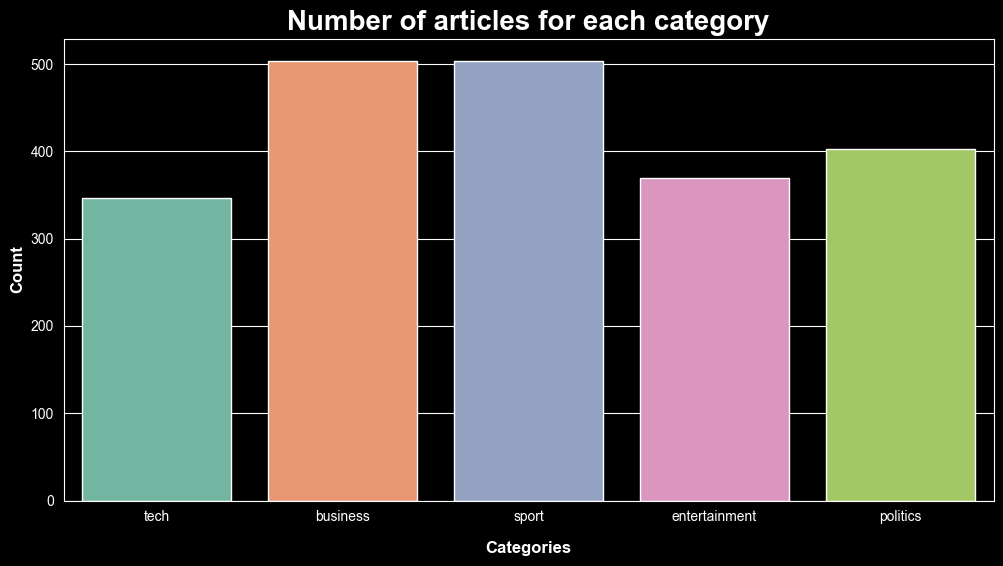

In [65]:
plt.style.use('dark_background')

plt.figure(figsize = (12 , 6))

sns.countplot(data = df , x = 'category' , palette='Set2' , hue = 'category')

plt.title('Number of articles for each category' , fontsize = 20 , fontweight = 'heavy' , color = '#FFFFFF')

plt.xlabel('Categories' , fontsize = 12 , fontweight = 'bold' , color = '#FFFFFF' , labelpad = 12)
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold' , color = '#FFFFFF')

plt.show()


<!-- --- -->

DATA CLEANING

HELPER FUNCTION TO MAP NLTK POSTAG TO WORDNET POSTAG

In [66]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  
    
    

In [67]:
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

In [68]:

cleaned_text = []

for sentence in df['text']:
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_words if word not in stop_words]
    sentence = ' '.join(words)
    cleaned_text.append(sentence)


df['text'] = cleaned_text
    


In [69]:
print("Sample cleaned text : ")

df['text'][0]

Sample cleaned text : 


'tv future hand viewer home theatre system plasma highdefinition tv digital video recorder move living room way people watch tv radically different five year time accord expert panel gather annual consumer electronics show la vegas discuss new technology impact one favourite pastime u lead trend programme content deliver viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allow much personalised tv also builtin highdefinition tv set big business japan u slow take europe lack highdefinition program people forward wind advert also forget abide network channel schedule put together alacarte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel although u lead tech

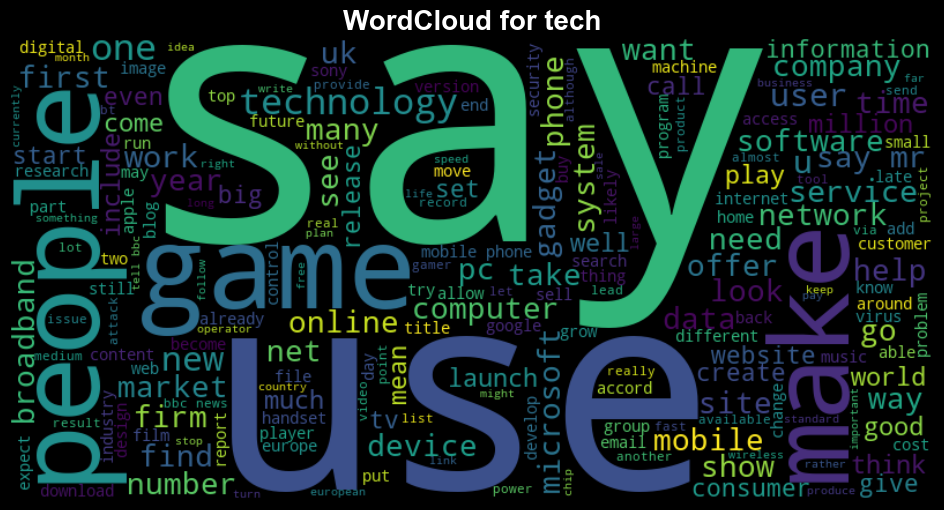

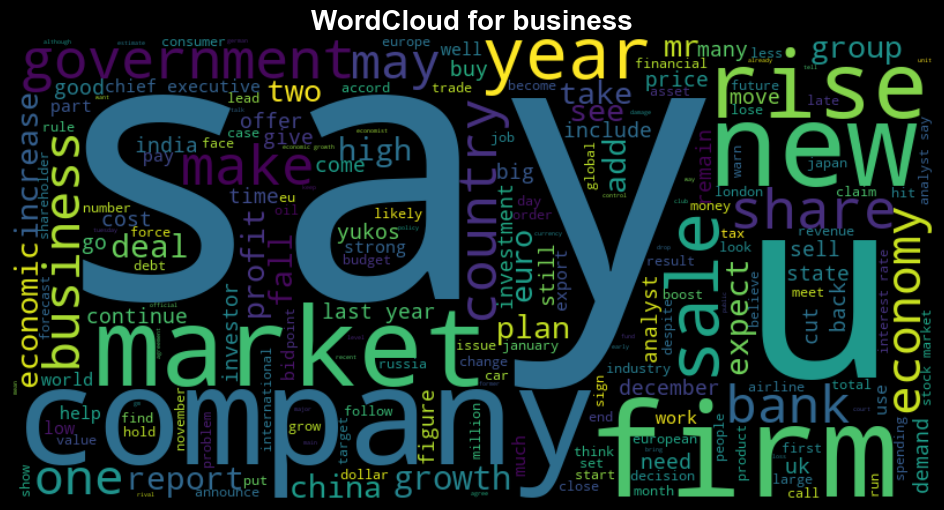

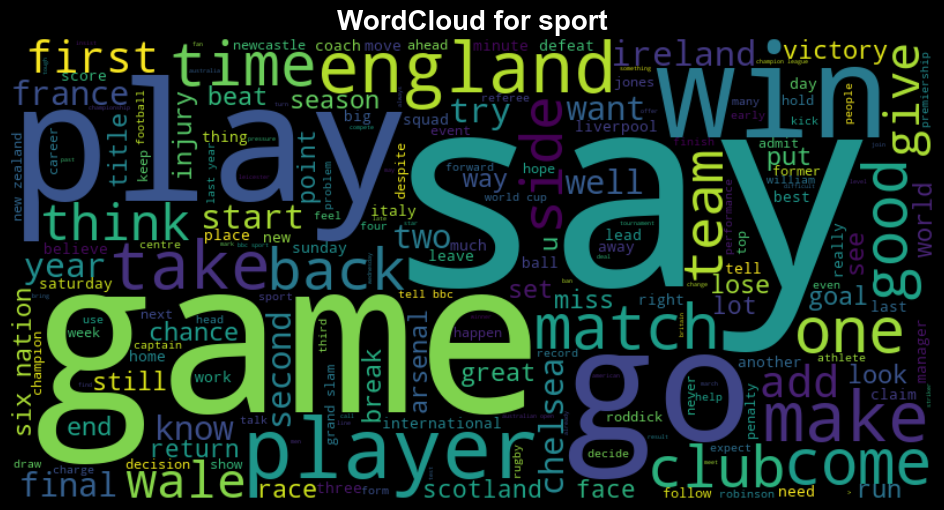

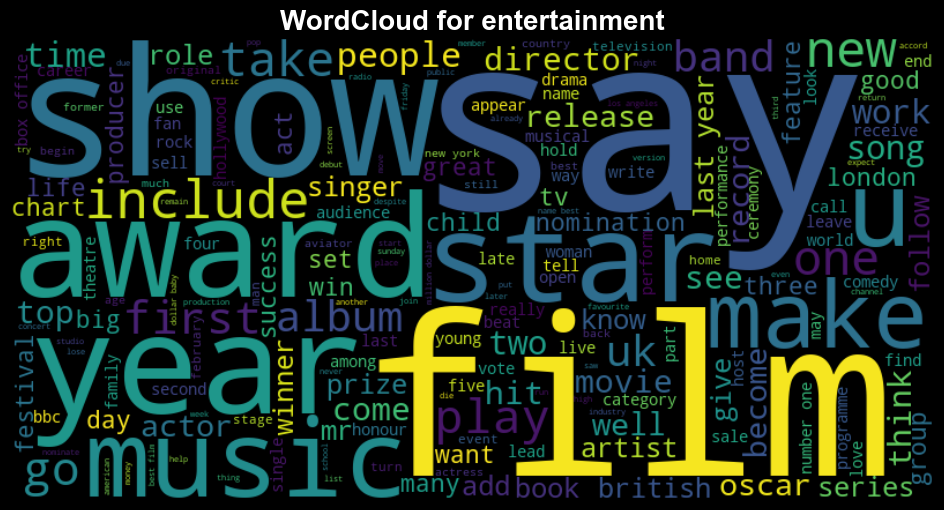

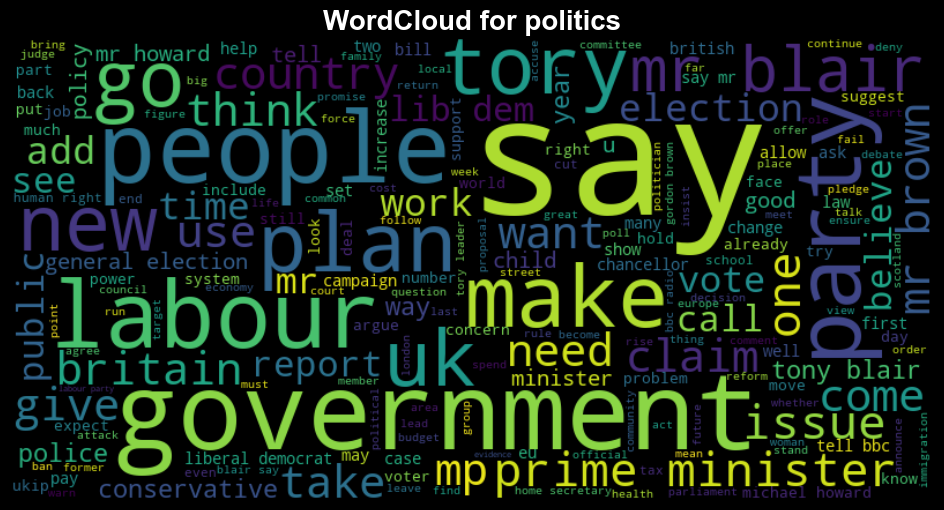

In [ ]:
plt.style.use('dark_background')

for category in df['category'].unique():
    # Filter rows for the current category
    category_rows = df[df['category'] == category]

    # Extract text column and convert to list
    text_list = category_rows['text'].tolist()

    # Join all text entries into one string
    text = ' '.join(text_list)

    # Generate WordCloud
    wc = WordCloud(width=800, height=400, background_color='black').generate(text)

     
    

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"WordCloud for {category}", fontsize=20 , fontweight = 'heavy' , color = '#FFFFFF')
    plt.axis('off')
    plt.show()      

In [72]:
print('No. of duplicates in dataset after cleaning : ' , df.duplicated().sum() , '\n')

print('Missing values in dataset after cleaning :- ')

df.isnull().sum()

No. of duplicates in dataset after cleaning :  8 

Missing values in dataset after cleaning :- 


category    0
text        0
dtype: int64

In [73]:
df.drop_duplicates(inplace=True)

print('Shape of cleaned dataset after removing duplicates : ' , df.shape)

Shape of cleaned dataset after removing duplicates :  (2118, 2)


In [75]:
df.head()

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos leave book alone former worldcom ...
2,sport,tiger wary farrell gamble leicester say rush m...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...


ENCODING THE TARGET VARIABLE

In [77]:
le = LabelEncoder()

df['category'] = le.fit_transform(df['category'])

In [78]:
df.head()

,category,text
0,4,tv future hand viewer home theatre system plas...
1,0,worldcom bos leave book alone former worldcom ...
2,3,tiger wary farrell gamble leicester say rush m...
3,3,yeading face newcastle fa cup premiership side...
4,1,ocean twelve raid box office ocean twelve crim...


In [79]:
df['category'].value_counts()

category
0    503
3    501
2    403
1    369
4    342
Name: count, dtype: int64

ENCODING TO TRUE LABEL VALUES :

In [81]:
for i, class_name in enumerate(le.classes_):
    print(f"{i} -> {class_name}")

0 -> business
1 -> entertainment
2 -> politics
3 -> sport
4 -> tech


SAVING THE CLEANED DATA TO CSV

In [82]:
df.to_csv('cleaned_bbc_text' , index = False)